In [1]:
'''
assume exponential utility and Gaussian distribution, here is a simplfied neural network to learn the fair measure transformation
based on dual problem and alpha is given by 3.2
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import random
from scipy.stats import multivariate_normal
import pandas as df
import random
import matplotlib.pyplot as plt

np.random.seed(1)
random.seed(1)

# Define a class Gaussian Distribution to Generate the Gaussion Distribution in N-dimensions
class GaussianND:
    # initialize the class
    def __init__(self,n_samples,n_institutions,means,covariance):
        '''
        Input:  n_institutions: number N
              means: list 1 x N
              covariance: 2D array: N x N
        Output: Generate function: n_samples x N 
        '''
        # Initialize the parameters
        self.n_samples = n_samples
        self.N = n_institutions
        self.means = means
        self.covariance = covariance
        # Get the eigen value and eigen vectors, to help generate N-dimensional data
        self.eigen_values, self.eigen_vectors = np.linalg.eig(self.covariance)
    def generate(self):
        component = []
        for i in range(self.n_samples):
            z = np.random.normal(0,1,self.N)
            x = self.means
            #print(x,"\n",self.covariance,"\n",self.eigen_values, "\n",self.eigen_vectors)
            for j in range(self.N):
              x += np.sqrt(self.eigen_values[j])*z[j]*self.eigen_vectors[j]
            component.append(x)
        return component

def generate_sample(n_samples,n_institutions,means,covariance):
    '''
    return np.array: n_samples x n_institutions
    '''
    sample = GaussianND(n_samples,n_institutions,means,covariance).generate()
    #print(sample[0:3])
    #data = df.DataFrame(np.array(sample))#columns= ['Inst 1','Inst 2','Inst 3']
    return np.array(sample)

#generate a random positive semi-definite N*N integer matrix as integer covariace matrix, in [0,m]
def generate_covint(N,m):
    A = np.random.rand(N,N)*m
    D = np.dot(A,A.transpose())
    return D
#convert covariance to correlation matrix and sigma vector: cor = diag^{-1}*cov*diag^{-1}
def func_correlation(cov, N):
    diag = np.zeros((N,N))      #diagonal matrix
    sig = []
    for i in range(N):
        diag[i][i] = cov[i][i]
        sig.append(np.sqrt(cov[i][i]))
    inv_diag_sqrt = np.linalg.inv(np.sqrt(diag))
    #print("covariance\n", cov,"\ndiagnal matrix\n",diag,"\ninverse diag suare root(sigma)\n", inv_diag_sqrt)
    return (np.dot(np.dot(inv_diag_sqrt,cov),inv_diag_sqrt)), sig


# number of sample 
number_of_sample = 50000
##number_of_val = 50
number_of_test = 50000

n_institutions = 100

means = sorted([(random.random()*3+0.1) for i in  range(n_institutions)])#[random.random()*3+0.1]*n_institutions #*5+.1

### control sigma < mean
covariance = generate_covint(n_institutions,1)
cor_mat = func_correlation(covariance, n_institutions)[0]
sig = [random.uniform(0,min(means[i],10)) for i in range(n_institutions)]
covariance = np.dot(np.dot(np.diag(sig),cor_mat),np.diag(sig))
print("Correlation:\n",cor_mat,"\n and Standard deviation: ",sig )
###


train_data = generate_sample(number_of_sample,n_institutions,means,covariance)
##val_data = generate_sample(number_of_val,n_institutions,means,covariance)
test_data = generate_sample(number_of_test,n_institutions,means,covariance)

Correlation:
 [[1.         0.70930435 0.75530434 ... 0.7292794  0.75705539 0.74074483]
 [0.70930435 1.         0.76698649 ... 0.7015073  0.77842755 0.75469817]
 [0.75530434 0.76698649 1.         ... 0.74325844 0.79514863 0.81725695]
 ...
 [0.7292794  0.7015073  0.74325844 ... 1.         0.79329665 0.7064311 ]
 [0.75705539 0.77842755 0.79514863 ... 0.79329665 1.         0.74155374]
 [0.74074483 0.75469817 0.81725695 ... 0.7064311  0.74155374 1.        ]] 
 and Standard deviation:  [0.005966925728530855, 0.10190201731484361, 0.09374728644794143, 0.03523920033823847, 0.0933947015447336, 0.09074033274454729, 0.06733514749000892, 0.0663673449149741, 0.10962216189901575, 0.14369054588386304, 0.2336988522683774, 0.21197072475761597, 0.014074011179830035, 0.1402996011438962, 0.10969770421240793, 0.3844109012218296, 0.6455828866401715, 0.6038937930687457, 0.6098394167920639, 0.641953816309083, 0.20234596034167576, 0.6704736511507633, 0.5379882406573236, 0.06893617100558444, 0.014440851299214477

In [2]:
means

[0.10631816005333208,
 0.11712738835117878,
 0.16446911579772663,
 0.1763375829803824,
 0.18504242956601893,
 0.18712236272460384,
 0.1887248919007212,
 0.1917699491006606,
 0.20357749045402476,
 0.2304618710695823,
 0.38157876032270466,
 0.4626698794174192,
 0.5030927323372036,
 0.6110475905670438,
 0.6190222047371527,
 0.6577187976841531,
 0.7497981913918401,
 0.7563431120130658,
 0.7650749988191051,
 0.7862866638113579,
 0.7925996246229529,
 0.7965283841890437,
 0.7992533507727179,
 0.8282199206292029,
 0.8652070772182651,
 0.9078384323242636,
 0.9693448437714567,
 1.010105532798753,
 1.0980855560803873,
 1.224109061504921,
 1.2436127130646373,
 1.2797652848926782,
 1.280799059133742,
 1.342941997902323,
 1.3663209998842456,
 1.366349726748152,
 1.3782720390644507,
 1.3983012037151603,
 1.4136627809517162,
 1.4168848901336895,
 1.4361615821644045,
 1.4484731943662146,
 1.4773951957320053,
 1.4788103972132007,
 1.5690805613867749,
 1.586305261275823,
 1.587436724145552,
 1.6067156753

In [3]:
import torch
#import torchvision
#import torchvision.transforms as transforms
#import matplotlib.pyplot as plt
#import random
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import time

## Training on GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

batch_size=1000
## Tensor Initialization
data_=torch.from_numpy(train_data).to(device)
dataset = torch.utils.data.TensorDataset(data_)
trainloader = torch.utils.data.DataLoader(dataset,batch_size, shuffle = False)
# validation data
##validation_data=torch.from_numpy(val_data).to(device)
# testing data
testdata=torch.from_numpy(test_data).to(device)
dataset = torch.utils.data.TensorDataset(testdata)
testloader = torch.utils.data.DataLoader(dataset,batch_size, shuffle = False)

In [4]:
# NN: Generator, return Z
class Generator(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        '''
        input_dim: number of uniform rvs, i.e. n_institutions 
        hidden_dim: list of hidden layer dimensions
        output_dim: number of classes i.e. n_institutions 
        '''
        super(Generator, self).__init__()
        model = [nn.Linear(input_dim, hidden_dim[0])]
        for i in range(len(hidden_dim)-1):
          model.append(nn.Linear(hidden_dim[i], hidden_dim[i+1]))
        model.append(nn.Linear(hidden_dim[-1], output_dim))
        self.model = nn.ModuleList(model)   
        

    def forward(self, x):
        '''
        Use ReLU nonlinearities in the layers, and nothing at the output.
        '''
        for i in range(len(self.model)-1):
          x = torch.relu(self.model[i](x))
        #x=torch.sigmoid(self.model[-1](x))
        #x=F.elu(self.model[-1](x))
        x=self.model[-1](x)
        return x

class Alpha_Loss(nn.Module):
    def __init__(self,utility,u_parameters, B, lam, group_size):
        """
        input:
            dQ_dP: current tranformation, siz M x 1
            utility function: 'exp','...'
            parameter for utitlity function: list of u_paramaters
        """
        super(Alpha_Loss, self).__init__()
        self.u = utility
        self.u_parameters = torch.tensor(u_parameters, device='cuda:0')
        self.B, self.lam = B, lam
        self.group_indexes = [0]
        for g in group_sizes:
          self.group_indexes.append(g+self.group_indexes[-1])
        
    def calculate_u(self, z):
        '''
        input:
          z - tensor(batch, N)
        return:
          tensor(batch), utilitiess or sum of u across N
        '''
        if self.u == 'exp':
          return torch.sum(-torch.exp(-z*self.u_parameters)/self.u_parameters, dim=1)
        
    def forward(self, dQ_dP, Z):
        """
        input:
            Z -- inputs: M x N
        return: value of loss function
        """

        # control lost
        sum_trans_Z = torch.reshape(torch.sum(Z[..., self.group_indexes[0]:self.group_indexes[1]], 1),(-1,1))*dQ_dP[..., 0:1]
        for i in range(1, len(self.group_indexes)-1):
          sum_trans_Z += torch.reshape(torch.sum(Z[..., self.group_indexes[i]:self.group_indexes[i+1]], 1),(-1,1))*dQ_dP[..., i:i+1]
        sum_u = self.calculate_u(Z)
        
        self.term1 = self.B - torch.mean(sum_u)
        self.term2 = torch.mean(sum_trans_Z, dim=0)
        
        return torch.mean(sum_trans_Z)  + self.lam*torch.relu(self.B - torch.mean(sum_u)) # 2nd term is the penalty

    def print_loss(self):
        print("B-sum u_n: ",self.term1.item(), " and penalty: ", self.lam*torch.relu(self.term1).item())
        print("-alpha",self.term2.detach())


In [5]:
# Neural Networks: approximate dQ/dP
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        '''
        uniform tranformation for X_i, thus input 1-d and output 1-d
          input_dim: N
          hidden_dim: list of hidden layer dimensions
          output_dim: 1
        '''
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        model = [nn.Linear(input_dim, hidden_dim[0])]
        for i in range(len(hidden_dim)-1):
          model.append(nn.Linear(hidden_dim[i], hidden_dim[i+1]))
        model.append(nn.Linear(hidden_dim[-1], output_dim))
        self.model = nn.ModuleList(model)   
        

    def forward(self, x):
        '''
        Use ReLU nonlinearities in the layers, and relu at the output.
        '''
        for i in range(len(self.model)-1):
          x = torch.relu(self.model[i](x))
        x = torch.log(1 + torch.exp(self.model[-1](x))) # relu + 0.01
        return x/torch.mean(x, dim=0)

class Loss(nn.Module):
    def __init__(self, u_paramaters, B, group_sizes):
        super(Loss, self).__init__()
        self.alphas = torch.tensor(u_paramaters).to(device)
        self.B = B
        self.beta = self.calculate_par()
        self.group_indexes = [0]
        for g in group_sizes:
          self.group_indexes.append(g+self.group_indexes[-1])

    def calculate_par(self):
        beta = 0
        for alpha in self.alphas:
          beta += 1/alpha
        return beta
        
    def forward(self,data,dQ_dP,loss_alpha):
        """
        input:
            dQ_dP -- inputs: M x group_size, generated from X by NN
            loss_alpha -- minimized 1 x 1 tensor under current dQ_dP, i.e. -alpha
        return: value of loss function
        """
        # control lost
        loss = torch.mean(torch.reshape(torch.sum(data[..., self.group_indexes[0]:self.group_indexes[1]], 1), 
                                (-1,1))*dQ_dP[..., 0:1], 0)
        
        for i in range(1, len(self.group_indexes)-1):
          loss += torch.mean(torch.reshape(torch.sum(data[..., self.group_indexes[i]:self.group_indexes[i+1]], 1), 
                                (-1,1))*dQ_dP[..., i:i+1], 0)
        
        return loss - loss_alpha

In [6]:
u_parameters = sorted([random.uniform(0.8, 3) for i in range(n_institutions)]) #[1,2,3]
#a = [round(num,3) for num in u_parameters]
'''
u_parameters  = [1.2,#0.8676421969658913,
  1.1122798436470818,
 1.3600655431719748,
 1.8948894071014162,
 1.942496453417903,
 2.0424170726028246,
 2.26928838290612,
 2.3344025824476655,
 2.6278998816486365,
 2.9867918993531175]
'''
group_sizes = [30, 40, 30]

a =[round(num,3) for num in u_parameters]


In [9]:
utility, B, lam_alpha  = 'exp',-1,10

input_dim= n_institutions     # how many Variables are in the dataset
hidden_dim = [64,64]#[64,32]          # hidden layer dimensions
#output_dim= n_institutions   # number of classes


## Instantiating the transformer
net = Net(input_dim, hidden_dim , len(group_sizes)).to(device) # we have 3 groups
criterion = Loss(u_parameters,B,group_sizes)
learning_rate = 0.001  #0.0005#0.0002#0.0002#0.0001
optimizer = optim.SGD(net.parameters(), lr=learning_rate,weight_decay=0.0001)

generator = Generator(n_institutions,[64,64],n_institutions).to(device)
gen_criterion = Alpha_Loss(utility,u_parameters, B, lam_alpha, group_sizes)
gen_optimizer = optim.SGD(generator.parameters(), lr=0.001, weight_decay=0.0001)#0.001


In [10]:

## 3. Training the neural network model
num_epochs = 2000

l_set = []
for j in range(1):
  print("Net {}".format(j+1))
  error_rate_paths=[[],[]]
  start_time = time.time()
  for epoch in range(num_epochs):  # loop over the dataset multiple times
      #if (epoch+1) % 500 == 0 and epoch+1<num_epochs:
        #optimizer.param_groups[0]['lr'] /= 5
        #gen_optimizer.param_groups[0]['lr'] /= 5
        #gen_criterion.lam *= 5
        
      print_bool = False
      if (epoch+1) % 50 ==0: 
        print_bool = True
        print("Epoch {}/{}".format(epoch+1,num_epochs))

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [N-dim inputs]
          input = data[0]
          # zero the parameter gradients, before each instance
          optimizer.zero_grad()
          # forward + backward + optimize
          output = net(input.float())   #dQ/dP , 500 x 1

          gen_optimizer.zero_grad()
          Z = generator(input.float())
          loss_alpha = gen_criterion(output,Z)

          loss = criterion(input,output,loss_alpha)
          loss.backward()

          for par in generator.parameters():
            par.grad *= -1
          gen_optimizer.step()
          optimizer.step()    # Does the update
          

          # print statistics
          running_loss += loss.item()
      l_set.append(running_loss / (i+1))
      if print_bool:
        print("Learn -rho, Training Loss: {:.3f}".format(running_loss / (i+1)))
  end_time = time.time()
  gen_criterion.print_loss()
  print('Finished Training for Net ',j+1)

  print(f"training time is {(end_time-start_time)/60:.2f} minutes")

Net 1
Epoch 50/2000
Learn -rho, Training Loss: -29.851
Epoch 100/2000
Learn -rho, Training Loss: -29.709
Epoch 150/2000
Learn -rho, Training Loss: -29.688
Epoch 200/2000
Learn -rho, Training Loss: -29.679
Epoch 250/2000
Learn -rho, Training Loss: -29.673
Epoch 300/2000
Learn -rho, Training Loss: -29.670
Epoch 350/2000
Learn -rho, Training Loss: -29.669
Epoch 400/2000
Learn -rho, Training Loss: -29.670
Epoch 450/2000
Learn -rho, Training Loss: -29.670
Epoch 500/2000
Learn -rho, Training Loss: -29.671
Epoch 550/2000
Learn -rho, Training Loss: -29.672
Epoch 600/2000
Learn -rho, Training Loss: -29.672
Epoch 650/2000
Learn -rho, Training Loss: -29.673
Epoch 700/2000
Learn -rho, Training Loss: -29.672
Epoch 750/2000
Learn -rho, Training Loss: -29.672
Epoch 800/2000
Learn -rho, Training Loss: -29.672
Epoch 850/2000
Learn -rho, Training Loss: -29.672
Epoch 900/2000
Learn -rho, Training Loss: -29.672
Epoch 950/2000
Learn -rho, Training Loss: -29.673
Epoch 1000/2000
Learn -rho, Training Loss: -2

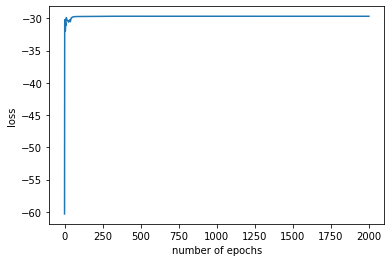

In [11]:
plt.plot(np.arange(num_epochs),l_set)
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.show()

In [12]:
class ExpExample:
  def __init__(self,data,u_parameters, B, group_sizes):
    '''
    data: sample size M x N
    u_parameters: list, alpha's of exponential utility
    B: number
    Notes:  calculate explicit result presented in Thm 6.2, wich group size h=1
            "expentation" is calculated by sample, not MGF of X
    '''
    self.group_indexes = [0]
    for g in group_sizes:
      self.group_indexes.append(g+self.group_indexes[-1])
    self.X = data
    self.alphas = torch.tensor(u_parameters).to(self.X.device)
    self.B = B
    self.beta, self.betams, self.inv_alpha = self.calculate_par()   # inv_alpha is a tensor
    self.N = self.X.size(dim=1)
    self.sum_Xs = torch.zeros(self.X.size(0), len(group_sizes)).to(self.X.device)
    for i in range(len(group_sizes)):
      self.sum_Xs[..., i] = torch.sum(self.X[..., self.group_indexes[i]:self.group_indexes[i+1]], dim=1)
    

    self.dms ,self.exp_X, self.mean_exp_X = self.calculate_d()
    self.d = sum(self.dms)

    self.Y = self.calculate_Yk()
    self.EQ_Y = self.EQ_Y()
    self.QP = self.Q()




  def calculate_par(self):
    beta = 0
    betams = []
    inv_alpha = []
    
    for alpha in self.alphas:
      beta += 1/alpha
      inv_alpha.append(1/alpha)
    inv_alpha = torch.tensor(inv_alpha).to(self.X.device)

    for i in range(len(self.group_indexes)-1):
      betams.append(sum(inv_alpha[self.group_indexes[i]:self.group_indexes[i+1]]).item())
    return beta, betams, inv_alpha

  def calculate_d(self):
    dms = []
    betams = torch.tensor(self.betams).to(self.X.device)
    exp_X = torch.exp(-self.sum_Xs/betams)
    emp_mgf = torch.mean(exp_X, dim=0)
    dms = betams * torch.log(-self.beta/self.B * emp_mgf)
    return dms, exp_X, emp_mgf

    """
    exp_X = []
    for i in range(self.M):
      exp_X.append(torch.exp(-self.sum_X[i]/self.beta))
    exp_X=torch.tensor(exp_X, requires_grad=True).to(self.X.device)
    emp_mgf = torch.mean(exp_X)
    d = self.beta * torch.log(-self.beta/self.B * emp_mgf)
    return d,exp_X,emp_mgf
    """

  def calculate_Yk(self):
    '''
    return: Y of size (M,N)
    '''
    Y = -self.X
    # calculate every vector Y = (Y^1,...Y^N) line by line: Y = -X + 1/beta * (X_bar+d) * ALPHA(1,N)
    #print(self.sum_X[i].size,self.d,"\n",torch.add(self.sum_X[i],self.d),"\n times vector",torch.mul(self.d,self.inv_alpha))
    for i in range(len(self.group_indexes)-1):
      Y[..., self.group_indexes[i]:self.group_indexes[i+1]] += 1/self.betams[i] \
                                            * (self.sum_Xs[..., i] + self.dms[i]).reshape(-1, 1) \
                                            / self.alphas[self.group_indexes[i]:self.group_indexes[i+1]]

    return Y
  
  def calculate_Eu(self):
    '''
    return: sum of u_n(X^n+Y^n)
    '''
    # temp, edited later if necessary
    sum_u = torch.zeros(10, 2)

    return torch.mean(sum_u)

  def EQ_Y(self):
    '''
    return: fair risk allocations E_{Q}[Y^n]
    '''
    trans_Yk = self.Y.clone()
    for i in range(len(self.group_indexes)-1):
      trans_Yk[..., self.group_indexes[i]:self.group_indexes[i+1]] *= self.exp_X[..., i].view(-1,1)/self.mean_exp_X[i]
    return torch.mean(trans_Yk,dim = 0).to(self.Y.device)  #mean for each column i.e. n

  def Q(self):
    '''
    return: fair measure density dQ/dP
    '''
    return self.exp_X/self.mean_exp_X

Example = ExpExample(testdata, u_parameters, B, group_sizes)#.to(device)


In [13]:
print("Overall risk/d/optimal of sum Y", Example.d)

Overall risk/d/optimal of sum Y tensor(88.5404, device='cuda:0')


In [14]:
print("Individual risk/d/optimal Y^k", torch.mean(Example.Y,0))

Individual risk/d/optimal Y^k tensor([ 4.8841,  4.8487,  4.7272,  4.4595,  4.4453,  4.4386,  4.1880,  4.0829,
         3.9889,  3.9345,  3.7190,  3.5633,  3.4996,  3.3796,  3.3119,  3.2422,
         3.1470,  2.9864,  2.7507,  2.7144,  2.5150,  2.4418,  2.4389,  2.3992,
         2.3130,  2.2134,  2.1261,  2.0757,  1.9278,  1.7720,  1.7257,  1.6403,
         1.5773,  1.5016,  1.4704,  1.3993,  1.3385,  1.3063,  1.2488,  1.2414,
         1.2221,  1.1966,  1.0812,  1.0435,  0.9537,  0.7983,  0.7129,  0.6725,
         0.6091,  0.5801,  0.4249,  0.4060,  0.3824,  0.2959,  0.2766,  0.2027,
         0.1980,  0.1644,  0.1294,  0.0728, -0.0210, -0.0396, -0.0700, -0.2259,
        -0.2753, -0.3323, -0.4094, -0.5205, -0.5411, -0.6024, -0.5494, -0.5525,
        -0.6108, -0.7369, -0.7431, -0.7779, -0.8014, -0.8545, -0.8646, -0.9005,
        -0.9481, -0.9854, -1.0170, -1.0349, -1.0572, -1.0944, -1.0988, -1.1275,
        -1.1385, -1.2247, -1.2385, -1.3087, -1.4421, -1.4390, -1.4666, -1.4836,
        -1

In [29]:
# Numerial: check accuracy of predicted fair individual allocation, with test data

output = torch.tensor([], device=device)
l_alpha = 0.0
l = 0.0
for i, data in enumerate(testloader, 0):
  testinput = data[0]
  testoutput = net(testinput.float()) 
  testZ = generator(testinput.float())
  loss_alpha = gen_criterion(testoutput,testZ)
  loss = criterion(testinput,testoutput,loss_alpha)
  l_alpha += loss_alpha.item()
  l += loss.item()
  output = torch.cat([output,testoutput])
print("Testing loss: {:.3f}".format(l / (i+1)))

for i in [0, 1, 2]:
  print("==="+str(i)+"===")
  diff = output[:, i] - Example.QP[:, i]

  relative_error = torch.mean(diff**2)**0.5/ torch.mean(Example.QP**2)**0.5
  print("From numerical, mean is ",torch.mean(output), 'optimal mean is',torch.mean(Example.QP[:, 0]) )
  print(f"Relative L2 Error rate for over 50000 samples: {relative_error.item()*100:.2f}%.")

Testing loss: -29.626
===0===
From numerical, mean is  tensor(1., device='cuda:0', grad_fn=<MeanBackward0>) optimal mean is tensor(1., device='cuda:0')
Relative L2 Error rate for over 50000 samples: 1.40%.
===1===
From numerical, mean is  tensor(1., device='cuda:0', grad_fn=<MeanBackward0>) optimal mean is tensor(1., device='cuda:0')
Relative L2 Error rate for over 50000 samples: 2.70%.
===2===
From numerical, mean is  tensor(1., device='cuda:0', grad_fn=<MeanBackward0>) optimal mean is tensor(1., device='cuda:0')
Relative L2 Error rate for over 50000 samples: 5.32%.


In [16]:
# alpha =beta * E[dQ_dP * ln(dQ_dP)]+beta * ln(-B/beta)
print('Estimated alpha: ', 
      -l_alpha/(i+1), 
      '\nTheoritical alpha on formula (3.13): ',
      torch.tensor(Example.betams).to(device)*torch.mean(Example.QP*torch.log(Example.QP), 0)+Example.beta*torch.log(-Example.B/Example.beta))

Estimated alpha:  -4703.4556884765625 
Theoritical alpha on formula (3.13):  tensor([-249.6581, -249.4582, -247.2843], device='cuda:0')


Metric to evaluate $dQ/dP$

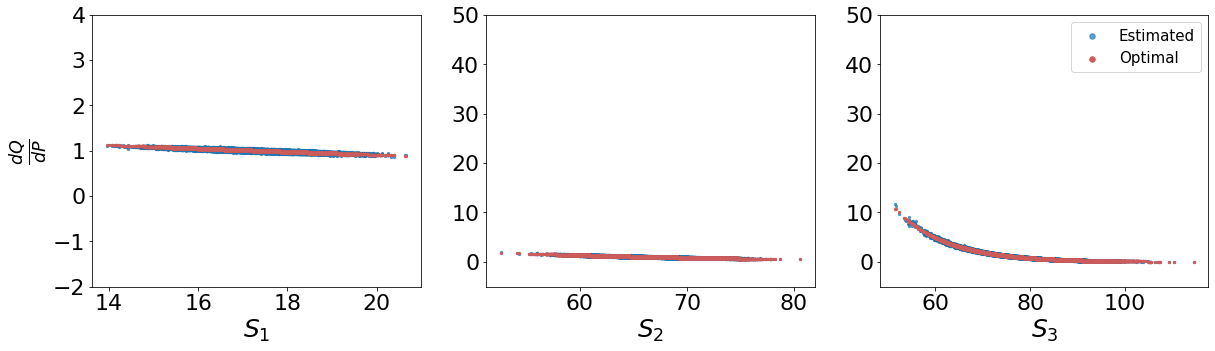

In [17]:
#===================================================#
# figure setup fonts and so on... 
# the label and font size should be adjusted such that 
# the figure fits well into ACM template
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)
plt.rc('legend', fontsize=25) 
plt.rc('axes', labelsize=25)
plt.rcParams["figure.figsize"] = (20, 5)
#===================================================#

## Graph fitting

fig, axs = plt.subplots(1, len(group_sizes), sharey=False)
for i in range(len(group_sizes)):
  axs[i].scatter(torch.sum(testdata[:, sum(group_sizes[:i]):sum(group_sizes[:i+1])],1).detach().cpu().numpy(), output[:, i].detach().cpu().numpy(),s = 5,label = "Estimated", alpha = 0.7)
  axs[i].scatter(torch.sum(testdata[:, sum(group_sizes[:i]):sum(group_sizes[:i+1])],1).detach().cpu().numpy(), Example.QP[:, i].detach().cpu().numpy(),s = 5, color="indianred", label = "Optimal")
axs[0].set_ylim(-2, 4)
axs[0].set_xlabel(r"$S_1$")
axs[0].set_ylabel(r"$\frac{dQ}{dP}$")
axs[1].set_ylim(-5, 50)
axs[1].set_xlabel(r"$S_2$")
axs[2].set_ylim(-5, 50)
axs[2].set_xlabel(r"$S_3$")


#plt.legend()
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=15)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
fig.savefig("dQdP_vs_sumX.pdf")

In [18]:
## Another Relative L1
re_1 = torch.mean(torch.abs(diff))/ torch.mean(torch.abs((Example.QP))) 
print(f"Relative L1 Error rate: {re_1.item()*100:.2f}%.")

Relative L1 Error rate: 2.29%.


In [19]:
## Relative Entropy
def relative_entropy(QP_hat,QP):
  #relative_e = torch.sum(QP_hat * torch.log(QP_hat/QP))
  relative_e = torch.mean(torch.abs(QP_hat-QP))/ torch.mean(torch.abs((QP))) 
  return relative_e.detach().cpu().item()

for i in range(len(group_sizes)):
  print(f"KL divergence for group {i}: ",relative_entropy(output[:, i].view(-1),Example.QP[:, i]))
#mid_dist = (output.view(-1) + Example.QP)/2
#print("Jensen-Shannon divergence: ",relative_entropy(output.view(-1),mid_dist)/2+relative_entropy(mid_dist,Example.QP)/2)

KL divergence for group 0:  0.012119627557694912
KL divergence for group 1:  0.02292284555733204
KL divergence for group 2:  0.037744153290987015


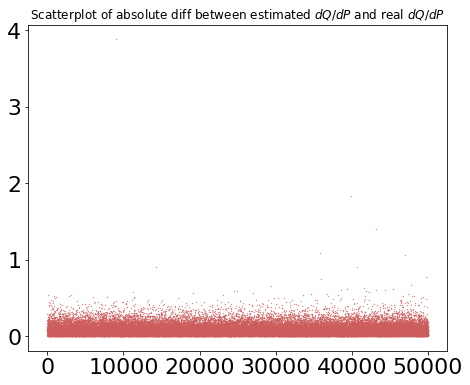

mean of diff tensor(0.0794, dtype=torch.float64, grad_fn=<MeanBackward0>) variance is tensor(0.0053, dtype=torch.float64, grad_fn=<VarBackward0>)


In [ ]:
#plt.scatter(np.arange(len(diff)),diff.detach().numpy(),s = 0.1, color="indianred")
plt.scatter(np.arange(len(diff)),(torch.abs(diff)).detach().numpy(),s = 0.1, color="indianred") #/Example.QP
#plt.ylim((0, 3))
plt.title(r'Scatterplot of absolute diff between estimated $dQ/dP$ and real $dQ/dP$' )
#plt.legend()
plt.show()
print("mean of diff",torch.mean(torch.abs(diff)), 'variance is',torch.var(torch.abs(diff)) )

**Compare $E_Q[Y^n]$**

In [24]:
## Copy from learning for risk measures.... train NN to get Y's
# Neural Networks
class Net_Y(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        '''
        input_dim: how many variables are in the dataset, i.e. n_institutions 
        hidden_dim: list of hidden layer dimensions
        output_dim: number of classes i.e. n_institutions 
        '''
        super(Net_Y, self).__init__()
        # an affine operation: y = Wx + b
        model = [nn.Linear(input_dim, hidden_dim[0])]
        for i in range(len(hidden_dim)-1):
          model.append(nn.Linear(hidden_dim[i], hidden_dim[i+1]))
        model.append(nn.Linear(hidden_dim[-1], output_dim))
        self.model = nn.ModuleList(model)   
        

    def forward(self, x):
        '''
        Use ReLU nonlinearities in the layers, and nothing at the output.
        '''
        for i in range(len(self.model)-1):
          x = torch.relu(self.model[i](x))
        #x=torch.sigmoid(self.model[-1](x))
        #x=F.elu(self.model[-1](x))
        #x=F.leaky_relu(self.model[-1](x))
        #x=torch.exp(self.model[-1](x))
        x=self.model[-1](x)
        return x

class Loss_Y(nn.Module):
    def __init__(self, utility,u_paramaters, B, lam, mu, group_sizes):
        """
        input:
            utility function: 'exp','...'
            parameter for utitlity function: list of u_paramaters
        """
        super(Loss_Y, self).__init__()
        self.u = utility
        self.u_parameters = torch.tensor(u_paramaters).to('cuda')
        self.B, self.lam, self.mu  = B, lam, mu
        self.group_sizes = group_sizes
        self.group_indexes = [0]
        for g in group_sizes:
          self.group_indexes.append(g+self.group_indexes[-1])
        
    def calculate_u(self, x):
        if self.u == 'exp':
          return torch.sum(-torch.exp(-x*self.u_parameters)/self.u_parameters, dim=1)
        
    def forward(self, X, Y):
        """
        input:
            X -- inputs: M x N
            Y -- outputs: M x N
        return: value of loss function
        """
        M = X.size(dim=0)
        # control lost
        sum_Y = torch.sum(Y, 1)
        sum_Ys = torch.zeros(Y.size(0), len(self.group_sizes)).to(Y.device)
        for i in range(len(self.group_sizes)):
          sum_Ys[..., i] = torch.sum(Y[..., self.group_indexes[i]:self.group_indexes[i+1]], dim=1)

        sum_u = self.calculate_u(X+Y)
        
        self.term1 = self.B - torch.mean(sum_u)
        self.term2 = torch.var(sum_Ys,dim = 0)
        self.term3 = torch.mean(sum_Ys, dim=0)
        self.term4 = torch.mean(sum_u)
        self.term5 = torch.mean(sum_Y)
        
        return torch.mean(sum_Y)  + torch.sum(self.mu*torch.std(sum_Ys,dim=0)) + self.lam*torch.relu(self.B - torch.mean(sum_u))#**2


    def print_loss(self):
        print("B-sum u_n",self.term1.item(),"\nsum u_n(Xn+Yn)",self.term4.item(), "\nvar(sumY) for groups",self.term2[0].item(),self.term2[1].item(),self.term2[2].item(), "\nmean(sumY) for groups", self.term3[0].item(),self.term3[1].item(),self.term3[2].item(),"\nOverall mean(sumY)", self.term5.item())

utility, B, lam, mu = 'exp',B, 1, 5  ######10,5

input_dim= n_institutions     # how many Variables are in the dataset
hidden_dim = [64,64]          # hidden layer dimensions
output_dim= n_institutions   # number of classes




In [25]:
## Instantiating the classifier
net_Y = Net_Y(input_dim, hidden_dim ,output_dim).to(device)
criterion_Y = Loss_Y(utility,u_parameters, B, lam, mu,group_sizes)
learning_rate = 0.0001#0.0001
optimizer = optim.SGD(net_Y.parameters(), lr=learning_rate, weight_decay=0.0001)

## 3. Training the neural network model
num_epochs = 3000

l_set = []
for j in range(1):
  print("Net {}".format(j+1))
  error_rate_paths=[[],[]]
  for epoch in range(num_epochs):  # loop over the dataset multiple times
      if (epoch+1) % 1000 == 0 and epoch+1<num_epochs:
        optimizer.param_groups[0]['lr'] /= 5
        criterion_Y.lam *= 5
        criterion_Y.mu *= 5

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [N-dim inputs]
          input = data[0]
          # zero the parameter gradients, before each instance
          optimizer.zero_grad()
          # forward + backward + optimize
          output_tmp = net_Y(input.float())
          loss = criterion_Y(input, output_tmp)
          print(loss.item())
          loss.backward()
          optimizer.step()    # Does the update

          # print statisticsç
          running_loss += loss.item()
      l_set.append(running_loss / (i+1))
      if epoch % 50 ==0:
        print("Epoch {}/{}, Training Loss: {:.3f}".format(epoch+1,num_epochs, running_loss / (i+1)))
  criterion_Y.print_loss()
  print('Finished Training for Net ',j+1)

Net 1
1.2114238770968987e+24
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Epoch 1/3000, Training Loss: nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
na

KeyboardInterrupt: ignored

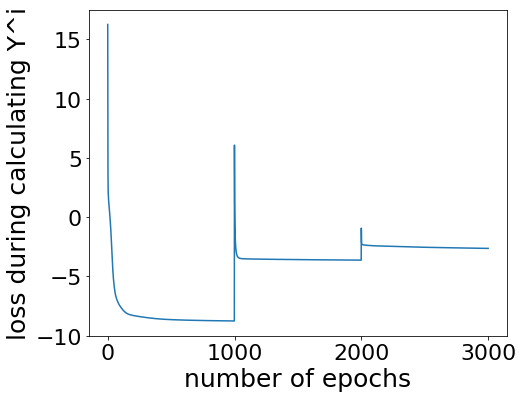

In [ ]:
plt.plot(np.arange(num_epochs),l_set)# s = 0.1
#plt.ylim((52,53))
plt.xlabel('number of epochs')
plt.ylabel('loss during calculating Y^i')
plt.show() 

In [ ]:
Y_output = net_Y(testdata.float())
EQY_output = torch.mean(Y_output*output,0)
print(np.round(EQY_output.detach().numpy(), 2))
print(np.round(Example.EQ_Y.detach().numpy(), 2))

[ 1.03  1.01  0.76  0.22 -0.45 -1.06 -0.12 -0.71 -2.33 -2.11]
[ 1.02  0.99  0.74  0.18 -0.47 -1.08 -0.16 -0.75 -2.34 -2.11]


In [ ]:
(EQY_output-Example.EQ_Y).detach().numpy()

array([0.01713413, 0.01570004, 0.01974157, 0.03585234, 0.01903432,
       0.01713324, 0.03548132, 0.03058602, 0.01217975, 0.00533533])

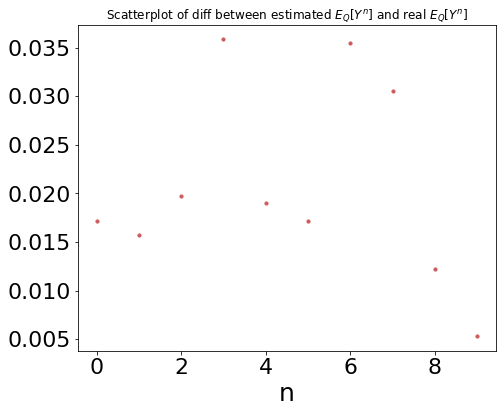

Relative error of predicted fair risk allocation: 2.082%.


In [ ]:
import matplotlib.pyplot as plt
diff_EXP = torch.abs((EQY_output-Example.EQ_Y))#/Example.EQ_Y
plt.scatter(np.arange(n_institutions),diff_EXP.detach().numpy(),s = 10, color="indianred")
#plt.ylim((0, 0.1))
plt.xlabel('n')
plt.title(r'Scatterplot of diff between estimated $E_Q[Y^n]$ and real $E_Q[Y^n]$' )#relative 
#plt.legend()
plt.show()
print(f"Relative error of predicted fair risk allocation: {torch.mean(diff_EXP)*100:.3f}%.")
#print(diff_EXP*Example.EQ_Y, Example.EQ_Y)

In [ ]:
torch.mean(diff_EXP)/torch.mean(torch.abs(Example.EQ_Y))

tensor(0.0212, dtype=torch.float64, grad_fn=<DivBackward0>)